<a href="https://colab.research.google.com/github/josolmedo/Tesis/blob/main/Primera_Exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Los archivos con terminación .h5 son frecuentemente usados por la comunidad científica, contienen grandes cantidados de datos y están compuestos por dos tipos de datos: Grupos (Contienen otros grupos y datasets) y Datasets (colecciones de datos en forma de arreglo)


Los grupos son como diccionarios.
Los datasets como arreglos de tipo Numpy.

In [15]:
import h5py #Importamos biblioteca para el manejo de archivos .h5
import matplotlib.pyplot as plt #Importamos biblioteca para manejar gráficos
f = h5py.File('Prueba.h5', 'r') # Abrir el archivo H5 en modo de solo lectura
list(f.keys()) #Listo los grupos disponibles en el archivo (a primera vista)

['Data']

In [2]:
GRUPO=f["Data"] #Guardo el grupo para mostrar su contenido
print(GRUPO) #Mostramos que el grupo "Data" contiene otro grupo en su interior.

<HDF5 group "/Data" (1 members)>


In [3]:
claves_en_grupo_Data=list(f["Data"].keys()) #Obtenemos la lista de claves en el grupo "Data"

print("Claves en el grupo 'Data':", claves_en_grupo_Data) # Imprimimos las claves

#Ciclo para iterar sobre las claves e imprimir información sobre cada conjunto de datos o subgrupo
for llaves in claves_en_grupo_Data:
    subgrupo = f["Data"][llaves] #Si es un subgrupo tendra la nomeclatura presentada
    '''La función isinstance(obj, class) devuelve True si obj es una instancia
     de la clase especificada y False en caso contrario.
     En este contexto, se utiliza para determinar si subgrupo es un conjunto de datos o un subgrupo. '''
    if isinstance(subgrupo, h5py.Dataset): #Si es un dataset
    #Imprimir si es un dataset (conjuntod e datos)
        print(f"{llaves} es un conjunto de datos con forma {subgrupo.shape} y tipo {subgrupo.dtype}")
    elif isinstance(subgrupo, h5py.Group): #Si es un subgrupo
    #Imprimir que es un subgrupo que contiene las claves presentadas
        print(f"{llaves} es un subgrupo con las siguientes claves: {list(subgrupo.keys())}")

# Cierra el archivo HDF5 después de usarlo
#f.close()


Claves en el grupo 'Data': ['Recording_0']
Recording_0 es un subgrupo con las siguientes claves: ['AnalogStream']


In [4]:
'''Analizamos si hay más llaves contenidas'''
siguiente_llave=list(f["Data"]["Recording_0"]["AnalogStream"].keys())
print(siguiente_llave)

['Stream_0']


In [5]:
'''Analizamos si hay más llaves contenidas'''
otra_llave=list(f["Data"]["Recording_0"]["AnalogStream"]["Stream_0"].keys())
print(otra_llave)

['ChannelData', 'ChannelDataTimeStamps', 'InfoChannel']


Cansado de hacer un análisis de llave por llave, es mejor hacer un ciclo para ahondar en todas las llaves contenidas en el grupo principal, para ver los datasets y subgrupos.


In [6]:
def imprimir_claves_grupo(grupo, ruta=""):
    """
    Define una función llamada imprimir_claves_grupo que toma dos argumentos:
    grupo, que es el grupo HDF5 que se va a explorar, y
    ruta, que es una cadena opcional que representa la ruta hasta el grupo actual en términos de claves.
    """
    for clave in grupo.keys(): #Para cada clave en el grupo actual
        ruta_actual = ruta + "/" + clave if ruta else clave  # Construir la ruta completa
        if isinstance(grupo[clave], h5py.Group):
            # Si es un grupo, llamar a la función recursivamente para explorar sus claves
            imprimir_claves_grupo(grupo[clave], ruta_actual)
        else:
            # Si es un conjunto de datos, imprimir información sobre la clave
            print(f"Clave: {ruta_actual}, Forma: {grupo[clave].shape}, Tipo: {grupo[clave].dtype}")

# Abrir el archivo HDF5 en modo de solo lectura
with h5py.File('Prueba.h5', 'r') as archivo_hdf5:
    # Llamar a la función para imprimir todas las claves en el grupo raíz
    imprimir_claves_grupo(archivo_hdf5)


Clave: Data/Recording_0/AnalogStream/Stream_0/ChannelData, Forma: (9, 6000000), Tipo: int32
Clave: Data/Recording_0/AnalogStream/Stream_0/ChannelDataTimeStamps, Forma: (1, 3), Tipo: int64
Clave: Data/Recording_0/AnalogStream/Stream_0/InfoChannel, Forma: (9,), Tipo: [('ChannelID', '<i4'), ('RowIndex', '<i4'), ('GroupID', '<i4'), ('ElectrodeGroup', '<i4'), ('Label', 'O'), ('RawDataType', 'O'), ('Unit', 'O'), ('Exponent', '<i4'), ('ADZero', '<i4'), ('Tick', '<i8'), ('ConversionFactor', '<i8'), ('ADCBits', '<i4'), ('HighPassFilterType', 'O'), ('HighPassFilterCutOffFrequency', 'O'), ('HighPassFilterOrder', '<i4'), ('LowPassFilterType', 'O'), ('LowPassFilterCutOffFrequency', 'O'), ('LowPassFilterOrder', '<i4')]


In [7]:
channel_data = f["Data"]["Recording_0"]["AnalogStream"]["Stream_0"]["ChannelData"]
# Ahora 'channel_data' contiene el conjunto de datos 'ChannelData'

timestamps_data = f["Data"]["Recording_0"]["AnalogStream"]["Stream_0"]["ChannelDataTimeStamps"]
# Ahora 'timestamps_data' contiene el conjunto de datos 'ChannelDataTimeStamps'

info_channel_data = f["Data"]["Recording_0"]["AnalogStream"]["Stream_0"]["InfoChannel"]
# Ahora 'info_channel_data' contiene el conjunto de datos 'InfoChannel'


Primeros 10 datos de ChannelData:
[[ -89 -140  -10    8  -38   65   52  -43   29   38]
 [ -72 -203 -203 -151 -145  -71  111  239  160   76]
 [ -10  -61  -86  -18   23   -8  -22   20   47  -15]
 [ -51 -100  -86  -86  -55   25   59   43   11  -16]
 [ -36  -92  -89  -61  -31   12   39   66   56   -2]
 [ -41  -79  -53  -77  -43   62   32   -5   59   65]
 [ -57  -87   -1  -11  -88   -9   94   65   -9  -31]
 [ -27  -92 -118  -97  -68   29   74   44   54   -7]
 [ -11  -97 -153  -57    6   27   56   55   19  -66]]


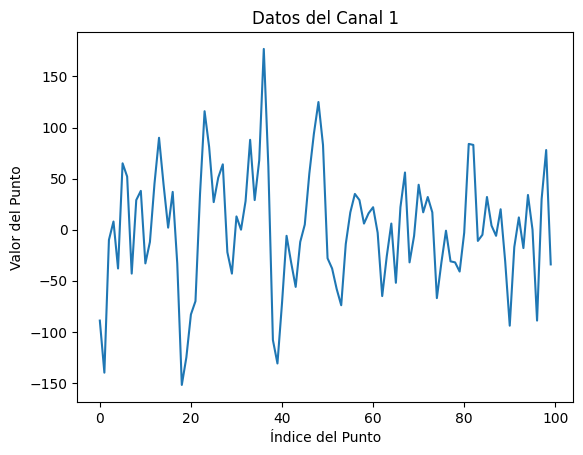

In [31]:

# Abrir el archivo HDF5 en modo de solo lectura
with h5py.File('Prueba.h5', 'r') as archivo_hdf5:
    # Acceder al conjunto de datos 'ChannelData'
    # Obtener los primeros 5 datos
    primeros_10_datos = channel_data[:, :10]

    # Imprimir los primeros 5 datos
    print("Primeros 10 datos de ChannelData:")
    print(primeros_10_datos)

    primeros_1000_puntos = channel_data[0, :100]

    # Crear un gráfico
    plt.plot(primeros_1000_puntos)
    plt.title("Datos del Canal 1") #Primera fila
    plt.xlabel("Índice del Punto")
    plt.ylabel("Valor del Punto")
    plt.show()


In [9]:
type(channel_data)

h5py._hl.dataset.Dataset

In [25]:
with h5py.File('Prueba.h5', 'r') as archivo_hdf5:
    # Acceder al conjunto de datos 'ChannelDataTimeStamps'
    timestamps_data = archivo_hdf5["Data"]["Recording_0"]["AnalogStream"]["Stream_0"]["ChannelDataTimeStamps"]

    # Imprimir información clave
    print("Forma de ChannelDataTimeStamps:", timestamps_data.shape)

    # Imprimir los primeros 5 valores
    print("Valores de ChannelDataTimeStamps:", timestamps_data[:, :])
    # Puedes agregar más información según sea necesario

Forma de ChannelDataTimeStamps: (1, 3)
Valores de ChannelDataTimeStamps: [[      0       0 5999999]]


In [39]:
with h5py.File('Prueba.h5', 'r') as archivo_hdf5:
    # Acceder al conjunto de datos 'InfoChannel'
    info_channel_data = archivo_hdf5["Data"]["Recording_0"]["AnalogStream"]["Stream_0"]["InfoChannel"]

    # Imprimir información clave
    print("Forma de InfoChannel:", info_channel_data.shape)

    # Imprimir algunos valores de los primeros elementos en la estructura
    print("Valores de InfoChannel:")
    for i in range(info_channel_data.shape[0]):
        print(f"Elemento {i + 1}: {info_channel_data[i]}")

Forma de InfoChannel: (9,)
Valores de InfoChannel:
Elemento 1: (82, 0, 0, 0, b'K5', b'Int', b'V', -12, 0, 100, 59605, 24, b'', b'-1', -1, b'', b'-1', -1)
Elemento 2: (83, 1, 0, 0, b'L5', b'Int', b'V', -12, 0, 100, 59605, 24, b'', b'-1', -1, b'', b'-1', -1)
Elemento 3: (84, 2, 0, 0, b'M5', b'Int', b'V', -12, 0, 100, 59605, 24, b'', b'-1', -1, b'', b'-1', -1)
Elemento 4: (86, 3, 0, 0, b'K6', b'Int', b'V', -12, 0, 100, 59605, 24, b'', b'-1', -1, b'', b'-1', -1)
Elemento 5: (87, 4, 0, 0, b'L6', b'Int', b'V', -12, 0, 100, 59605, 24, b'', b'-1', -1, b'', b'-1', -1)
Elemento 6: (88, 5, 0, 0, b'M6', b'Int', b'V', -12, 0, 100, 59605, 24, b'', b'-1', -1, b'', b'-1', -1)
Elemento 7: (92, 6, 0, 0, b'M7', b'Int', b'V', -12, 0, 100, 59605, 24, b'', b'-1', -1, b'', b'-1', -1)
Elemento 8: (93, 7, 0, 0, b'L7', b'Int', b'V', -12, 0, 100, 59605, 24, b'', b'-1', -1, b'', b'-1', -1)
Elemento 9: (94, 8, 0, 0, b'K7', b'Int', b'V', -12, 0, 100, 59605, 24, b'', b'-1', -1, b'', b'-1', -1)
